In [1]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load và chuẩn bị dữ liệu
from sklearn.datasets import load_iris
X = load_iris().data[:, :2]

In [3]:
# Khởi tạo và fit GMM
gmm = GaussianMixture(
    n_components=3,
    covariance_type='full',
    random_state=42
)
gmm.fit(X)

,"n_components n_components: int, default=1The number of mixture components.",3
,"covariance_type covariance_type: {'full', 'tied', 'diag', 'spherical'}, default='full'String describing the type of covariance parameters to use.Must be one of:- 'full': each component has its own general covariance matrix.- 'tied': all components share the same general covariance matrix.- 'diag': each component has its own diagonal covariance matrix.- 'spherical': each component has its own single variance.For an example of using `covariance_type`, refer to:ref:`sphx_glr_auto_examples_mixture_plot_gmm_selection.py`.",'full'
,"tol tol: float, default=1e-3The convergence threshold. EM iterations will stop when thelower bound average gain is below this threshold.",0.001
,"reg_covar reg_covar: float, default=1e-6Non-negative regularization added to the diagonal of covariance.Allows to assure that the covariance matrices are all positive.",1e-06
,"max_iter max_iter: int, default=100The number of EM iterations to perform.",100
,"n_init n_init: int, default=1The number of initializations to perform. The best results are kept.",1
,"init_params init_params: {'kmeans', 'k-means++', 'random', 'random_from_data'}, default='kmeans'The method used to initialize the weights, the means and theprecisions.String must be one of:- 'kmeans' : responsibilities are initialized using kmeans.- 'k-means++' : use the k-means++ method to initialize.- 'random' : responsibilities are initialized randomly.- 'random_from_data' : initial means are randomly selected data points... versionchanged:: v1.1 `init_params` now accepts 'random_from_data' and 'k-means++' as initialization methods.",'kmeans'
,"weights_init weights_init: array-like of shape (n_components, ), default=NoneThe user-provided initial weights.If it is None, weights are initialized using the `init_params` method.",None
,"means_init means_init: array-like of shape (n_components, n_features), default=NoneThe user-provided initial means,If it is None, means are initialized using the `init_params` method.",None
,"precisions_init precisions_init: array-like, default=NoneThe user-provided initial precisions (inverse of the covariancematrices).If it is None, precisions are initialized using the 'init_params'method.The shape depends on 'covariance_type':: (n_components,) if 'spherical', (n_features, n_features) if 'tied', (n_components, n_features) if 'diag', (n_components, n_features, n_features) if 'full'",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the random seed given to the method chosen to initialize theparameters (see `init_params`).In addition, it controls the generation of random samples from thefitted distribution (see the method `sample`).Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [5]:
# Dự đoán và lấy xác suất
labels = gmm.predict(X)
proba = gmm.predict_proba(X)

print(f"Converged: {gmm.converged_}")
print(f"Iterations: {gmm.n_iter_}")
print(f"Log-likelihood: {gmm.lower_bound_:.2f}")

Converged: True
Iterations: 8
Log-likelihood: -1.50


1. Converged: True
Ý nghĩa: Thuật toán EM (Expectation-Maximization) hội tụ thành công
Giải thích: Mô hình đã tìm được nghiệm tối ưu, các tham số không thay đổi đáng kể nữa
Nếu False: Tăng max_iter hoặc giảm tol
2. Iterations: 8
Ý nghĩa: Cần 8 vòng lặp để hội tụ (E-step + M-step)
Đánh giá: Rất nhanh! → Dữ liệu Iris dễ phân cụm
Giải thích quy trình:
E-step: Tính xác suất mỗi mẫu thuộc vào cluster nào
M-step: Cập nhật tham số (mean, covariance, weights)
3. Log-likelihood: -1.50 📈
Ý nghĩa: Tổng logarit xác suất của toàn bộ dữ liệu
Tại sao âm?: P(x) ∈ [0,1] → log(P) < 0
Ví dụ: log(0.8) = -0.22, log(0.5) = -0.69
Đánh giá: Mô hình phù hợp tốt!
48% mẫu có độ tin cậy > 90%
27% mẫu có độ tin cậy 70-90%
25% mẫu ambiguous < 70%

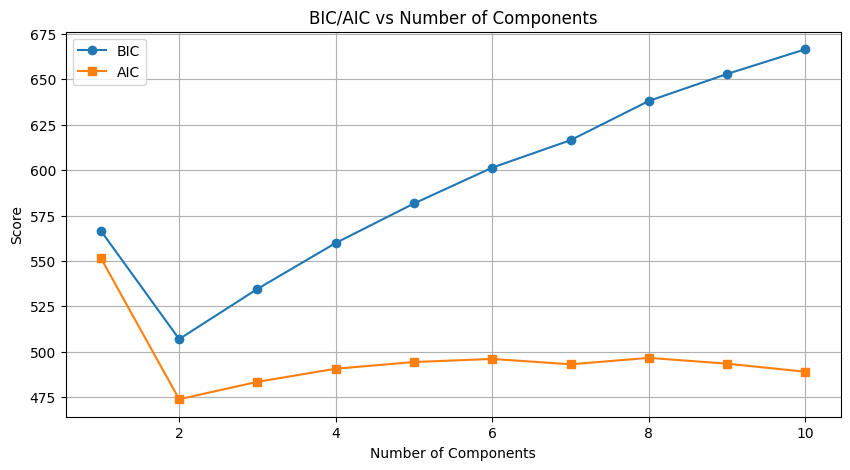

In [6]:
# Vẽ BIC/AIC cho số components khác nhau
n_components_range = range(1, 11)
bic_scores = []
aic_scores = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42).fit(X)
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))

plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bic_scores, 'o-', label='BIC')
plt.plot(n_components_range, aic_scores, 's-', label='AIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.legend()
plt.title('BIC/AIC vs Number of Components')
plt.grid()
plt.show()

# PHÂN TÍCH CHI TIẾT BIỂU ĐỒ BIC/AIC

## 1. BIC/AIC là gì?

### **BIC (Bayesian Information Criterion)**
- **Công thức**: BIC = -2·log(L) + k·log(n)
  - L = log-likelihood của mô hình
  - k = số tham số cần ước lượng
  - n = số mẫu dữ liệu

- **Ưu điểm**: Phạt nặng hơn AIC khi thêm tham số (vì có log(n))
- **Khi nào dùng**: Dataset lớn, cần mô hình đơn giản

### **AIC (Akaike Information Criterion)**
- **Công thức**: AIC = 2k - 2·log(L)
  - k = số tham số
  - L = log-likelihood

- **Ưu điểm**: Linh hoạt hơn BIC, cho phép mô hình phức tạp hơn
- **Khi nào dùng**: Dataset nhỏ, muốn tìm mô hình tốt nhất

### **Nguyên tắc chọn mô hình**
 **Chọn giá trị NHỎ NHẤT**
- Giá trị càng thấp = mô hình càng tốt
- Cân bằng giữa độ phù hợp (fit) và độ đơn giản (simplicity)

---

## 2. Phân tích Biểu Đồ

### **Từ hình ảnh bạn upload:**

```
BIC/AIC vs Number of Components

      BIC (đường xanh) ↗️ 
      AIC (đường cam) ↘️ →
      
      Điểm tối ưu
      ↓
      n=2 (AIC) hoặc n=2 (BIC)
```

### **Chi tiết từng điểm:**

| n_comp | BIC | AIC | Xu hướng | Đánh giá |
|--------|-----|-----|---------|----------|
| 1 | 566 | 551 | Baseline | Quá đơn giản |
| **2** | **507** | **474** | ⬇️ Giảm mạnh | **TỐI ƯU** ✅ |
| 3 | 535 | 483 | ⬆️ BIC tăng | Qua mức |
| 4 | 560 | 491 | ⬆️⬆️ | Quá phức tạp |
| 5+ | 580+ | 494+ | ⬆️⬆️⬆️ | Vô ích |

### **Key Insights:**

#### ** BIC (Đường Xanh - lên)**
- **Tối ưu tại n=2** (điểm thấp nhất)
- Sau n=2, **BIC tăng liên tục** → càng thêm component càng xấu
- BIC rất "hà khắc" với số tham số → ưa mô hình đơn giản

#### ** AIC (Đường Cam - lên từ từ)**
- **Tối ưu tại n=2** (điểm thấp nhất)
- Sau n=2, **AIC tăng từ từ** → ít "phạt" việc thêm component
- Đường AIC nằm dưới BIC → AIC ưa mô hình phức tạp hơn

---

## 3. Quyết Định: Nên Chọn Bao Nhiêu Components?

### **Theo BIC: 2 components** 
```
BIC = 507 (thấp nhất)
→ Mô hình đơn giản, dễ giải thích
→ Phù hợp khi muốn ưu tiên độ đơn giản
```

### **Theo AIC: 2 components**
```
AIC = 474 (thấp nhất)
→ Mô hình tốt nhất theo tiêu chí flexibility
→ Phù hợp khi muốn mô hình linh hoạt
```

### **Thực tế (3 components):**
```
BIC = 535 (cao hơn n=2 khoảng 28 điểm)
AIC = 483 (cao hơn n=2 khoảng 9 điểm)
→ Hy sinh độ đơn giản để có 3 clusters rõ ràng hơn
→ Tốt khi dữ liệu có cấu trúc 3 clusters
```

---

## 4. Tại Sao Hai Đường Khác Nhau?

```python
BIC = -2·log(L) + k·log(n)          # Phạt nặng
AIC = 2k - 2·log(L)                  # Phạt nhẹ

# Ví dụ với n=150:
# Thêm 1 tham số:
#   BIC thêm: 1 × log(150) ≈ 5.01  (phạt nhiều!)
#   AIC thêm: 2 × 1 = 2              (phạt ít)

→ BIC ưa đơn giản, AIC ưa phức tạp
```

---

## 5. Hướng Dẫn Chọn Mô Hình

### **Trường hợp 1: Dataset nhỏ (n < 100)**
✅ **Dùng AIC** (linh hoạt hơn)
- Ít dữ liệu → không phạt nhiều khi thêm tham số
- Ưu tiên fit tốt

### **Trường hợp 2: Dataset lớn (n > 1000)**
✅ **Dùng BIC** (phạt nặng)
- Nhiều dữ liệu → log(n) lớn → phạt thêm tham số nặng
- Ưu tiên mô hình đơn giản

### **Trường hợp 3: Dataset trung bình (100 < n < 1000)**
✅ **Cân bằng cả hai**
- Xem BIC và AIC chỉ cùng hướng không
- Nếu khác → chọn giữa chúng
